# Linear Regression

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/weight-height.csv')

In [ ]:
df.head()

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [ ]:
def line(x, w=0, b=0):
    return x * w + b

In [ ]:
x = np.linspace(55, 80, 100)

In [ ]:
x

In [ ]:
yhat = line(x, w=0, b=0)

In [ ]:
yhat

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [ ]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [ ]:
X = df[['Height']].values
y_true = df['Weight'].values

In [ ]:
y_true

In [ ]:
y_pred = line(X)

In [ ]:
y_pred

In [ ]:
mean_squared_error(y_true, y_pred.ravel())

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [ ]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

## Linear Regression with Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1, input_shape=(1,)))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [ ]:
model.fit(X, y_true, epochs=40)

In [ ]:
y_pred = model.predict(X)

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [ ]:
W, B = model.get_weights()

In [ ]:
W

In [ ]:
B

## Evaluating Model Performance

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

In [ ]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# Classification

In [ ]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [ ]:
df.head()

In [ ]:
df.plot(kind='scatter', x='Time (min)', y='Buy');

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [ ]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

In [ ]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [ ]:
temp_class = model.predict(temp) > 0.5

In [ ]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [ ]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

### Train/Test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [ ]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

In [ ]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [ ]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

## Cross Validation

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
cv = KFold(3, shuffle=True)

In [ ]:
scores = cross_val_score(model, X, y, cv=cv)

In [ ]:
scores

In [ ]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_class_pred)

In [ ]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [ ]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, y_class_pred))

## Feature Preprocessing

### Categorical Features

In [ ]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

In [ ]:
df['Gender'].unique()

In [ ]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

## Feature Transformations

#### 1) Rescale with fixed factor

In [ ]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [ ]:
df.describe().round(2)

#### MinMax normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

#### 3) Standard normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

In [ ]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature);

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [38]:
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('../data/housing-data.csv')

array([[<AxesSubplot: title={'center': 'sqft'}>,
        <AxesSubplot: title={'center': 'bdrms'}>],
       [<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

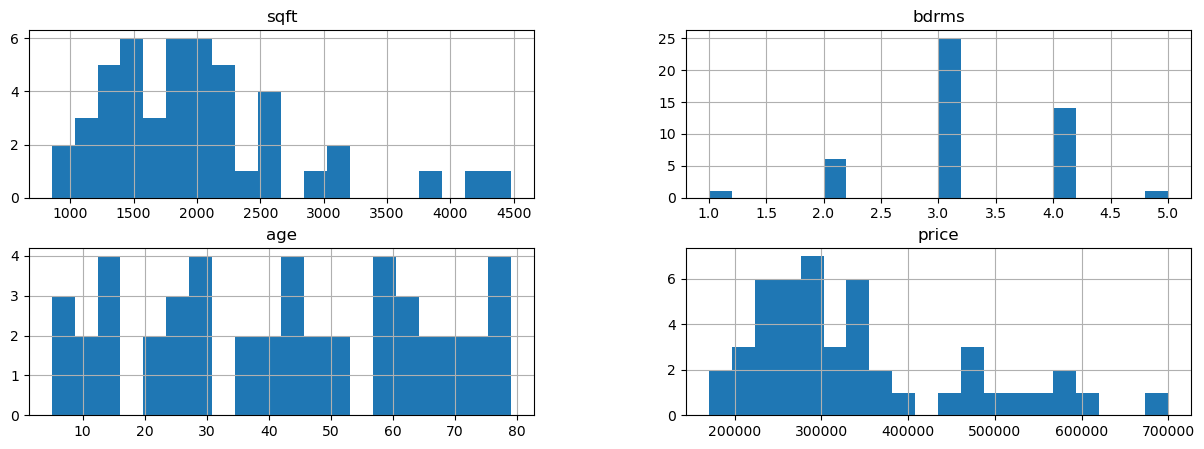

In [52]:
df.hist(bins=20, figsize=(15,5))

In [53]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [54]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [55]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

c:\Workspace\Anaconda3\envs\pier\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 113119985664.0000
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 110778679296.0000
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 108657090560.0000
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 106420985856.0000
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 104306114560.0000
Epoch 6/10
2/2 [==============================] - 0s 1ms/step - loss: 102183378944.0000
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 100174880768.0000
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 98194268160.0000
Epoch 9/10
2/2 [==============================] - 0s 1ms/step - loss: 96174448640.0000
Epoch 10/10
2/2 [==============================] - 0s 1ms/step - loss: 94282579968.0000


In [59]:
from sklearn.metrics import r2_score

In [60]:
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [62]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_pred_train)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))

The R2 score on the Train set is:	-4.468
The R2 score on the Test set is:	-7.721


In [63]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.reshape(-1, 1))

In [70]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.2), 'mean_squared_error')

c:\Workspace\Anaconda3\envs\pier\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2)

In [72]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 998us/step - loss: 1.0584
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4591
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3976
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5268
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5567
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4661
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3859
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3321
Epoch 9/20
2/2 [==============================] - 0s 999us/step - loss: 0.3208
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3295
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3299
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3394
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss

In [73]:
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)

1/1 [==============================] - 0s 14ms/step


In [74]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_pred_train)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))

The R2 score on the Train set is:	0.578
The R2 score on the Test set is:	0.714


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [121]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [102]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [104]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot: title={'center': 'satisfaction_level'}>,
        <AxesSubplot: title={'center': 'last_evaluation'}>,
        <AxesSubplot: title={'center': 'number_project'}>],
       [<AxesSubplot: title={'center': 'average_montly_hours'}>,
        <AxesSubplot: title={'center': 'time_spend_company'}>,
        <AxesSubplot: title={'center': 'Work_accident'}>],
       [<AxesSubplot: title={'center': 'left'}>,
        <AxesSubplot: title={'center': 'promotion_last_5years'}>,
        <AxesSubplot: >]], dtype=object)

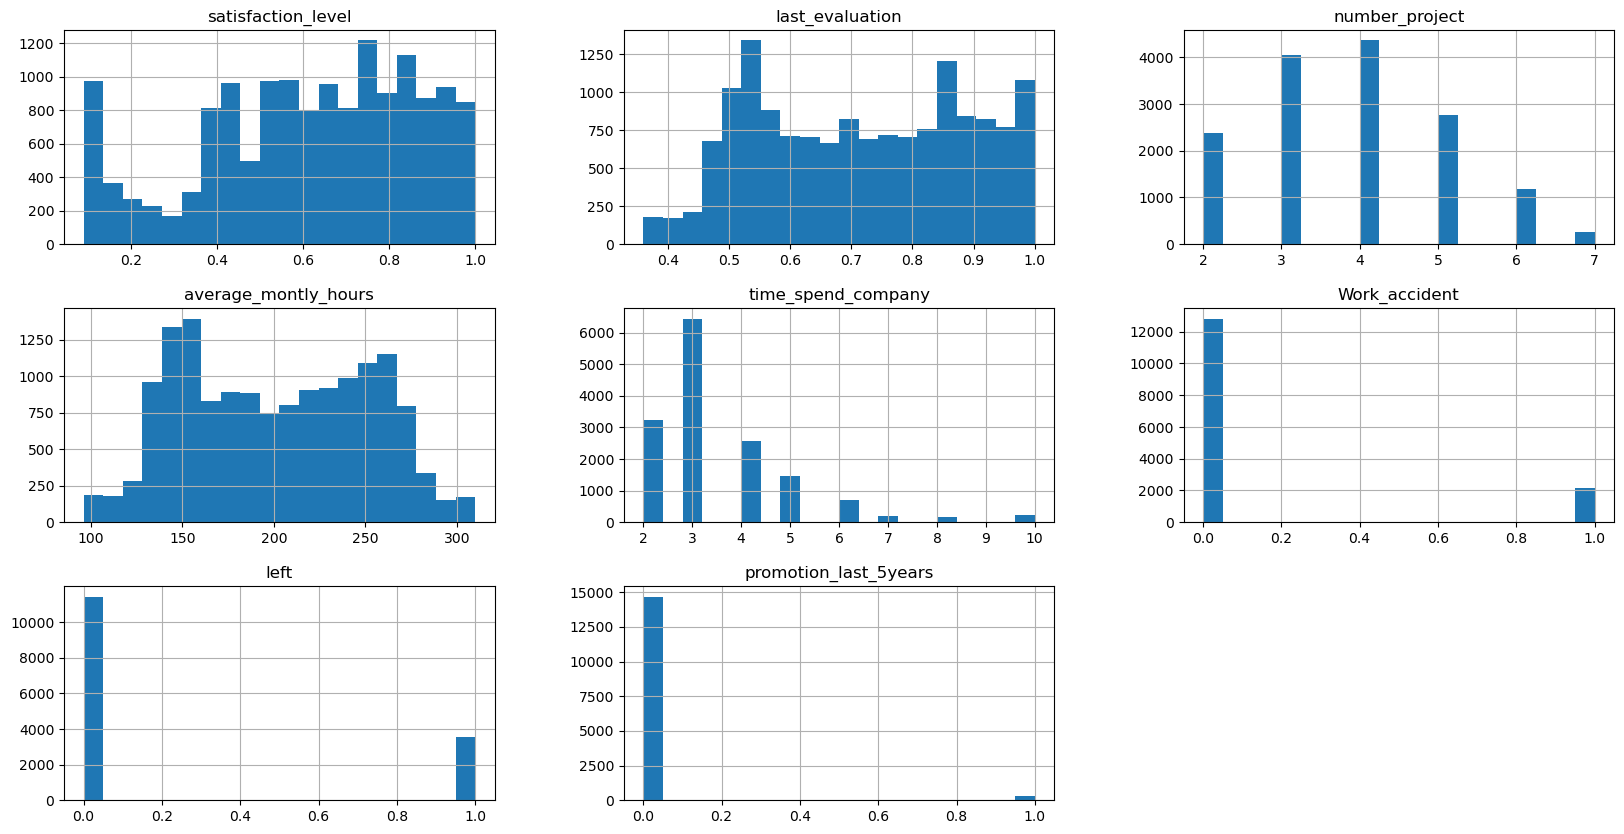

In [105]:
df.hist(bins=20, figsize=(20,10))

In [106]:
df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [122]:
# Convert the categorical variables into dummy variables
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [123]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [124]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [125]:
X = pd.concat([df.drop(['sales', 'salary', 'left'], axis=1), df_dummies], axis=1).values
y = df['left'].values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [127]:
X.shape

(14999, 20)

In [128]:
model = Sequential()
model.add(Dense(1, input_shape=(20,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

c:\Workspace\Anaconda3\envs\pier\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [129]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
375/375 [==============================] - 1s 845us/step - loss: 0.8539 - accuracy: 0.7395
Epoch 2/20
375/375 [==============================] - 0s 805us/step - loss: 0.5310 - accuracy: 0.7615
Epoch 3/20
375/375 [==============================] - 0s 805us/step - loss: 0.5694 - accuracy: 0.7593
Epoch 4/20
375/375 [==============================] - 0s 851us/step - loss: 0.5904 - accuracy: 0.7609
Epoch 5/20
375/375 [==============================] - 0s 779us/step - loss: 0.5226 - accuracy: 0.7688
Epoch 6/20
375/375 [==============================] - 0s 829us/step - loss: 0.5693 - accuracy: 0.7590
Epoch 7/20
375/375 [==============================] - 0s 920us/step - loss: 0.5332 - accuracy: 0.7681
Epoch 8/20
375/375 [==============================] - 0s 889us/step - loss: 0.5391 - accuracy: 0.7626
Epoch 9/20
375/375 [==============================] - 0s 993us/step - loss: 0.5378 - accuracy: 0.7679
Epoch 10/20
375/375 [==============================] - 0s 911us/step - loss: 0.552

In [131]:
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

94/94 [==============================] - 0s 1ms/step


In [132]:
from sklearn.metrics import confusion_matrix, classification_report


In [135]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [136]:
pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2250,0
Leave,750,0


In [137]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2250
           1       0.00      0.00      0.00       750

    accuracy                           0.75      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.56      0.75      0.64      3000



c:\Workspace\Anaconda3\envs\pier\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Workspace\Anaconda3\envs\pier\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Workspace\Anaconda3\envs\pier\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data
from keras.wrappers.scikit_learn import KerasClassifier

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=20, verbose=0)

C:\Users\pi.morelli\AppData\Local\Temp\ipykernel_12940\742244767.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_logistic_regression_model,


## K-Fold Validation

In [140]:
from sklearn.model_selection import KFold, cross_val_score

In [141]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7159 ± 0.0730


In [142]:
scores

array([0.759     , 0.57433331, 0.71733332, 0.76800001, 0.76058686])